In [1]:
setwd("~/WGS/SNPS/All_mylu/genolike/admix/logs/")

In [2]:
likes=read.csv('All_Admix_loglike.csv', header=F)

In [3]:
colnames(likes)=c("kvalue", "rep", "loglike")

In [4]:
likes

kvalue,rep,loglike
1,1,-2841805210
1,2,-2841805210
1,3,-2841805210
1,4,-2841805210
1,5,-2841805210
2,1,-2827101702
2,2,-2827117341
2,3,-2827401601
2,4,-2827259139
2,5,-2827479490


Delta K from evanno 2005 (jerome goudet see here:http://taylor0.biology.ucla.edu/structureHarvester/faq.html

1/ average the L(K) over the x (say 20) replicates

2/ estimate from these averages L''(K) as abs( L(K+1) - 2L(K) + L(K-1) )

3/ divide by the standard deviation of L(K) (sd of the different replicates for the same K)

In [5]:
meanlikes= do.call(data.frame, aggregate(. ~ kvalue, data = likes[-2], FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 

In [6]:
meanlikes

kvalue,loglike.av,loglike.stdev
1,-2841805210,3.424773e-05
2,-2827271855,1.680288e+05
3,-2812889602,3.222472e+05
4,-2798943880,1.124999e+05
5,-2785253566,1.373673e+05
6,-2771307832,1.744017e+05
7,-2757787103,6.869249e+04
8,-2744213217,3.435640e+05


In [32]:
meanlikes$Dk=NA
meanlikes$Lpk=NA
meanlikes$Lpk.s=NA
meanlikes$Lppk=NA
meanlikes$Lpk.s=NA

In [ ]:
for (k in 2:NROW(meanlikes)){
    
    meanlikes$Dk[k] = abs(meanlikes$loglike.av[k+1]-2*(meanlikes$loglike.av[k])+meanlikes$loglike.av[k-1])/meanlikes$loglike.stdev[k]    
    }

In [8]:
meanlikes$loglike.av[3]

[1] -2812889602

In [34]:
for (k in 2:NROW(meanlikes)){
    
    meanlikes$Lpk[k] = meanlikes$loglike.av[k]-(meanlikes$loglike.av[k-1]) 
    meanlikes$Lpk.s[k] = meanlikes$loglike.stdev[k]-(meanlikes$loglike.stdev[k-1])
}

In [35]:
for (k in 2:NROW(meanlikes)){ 
    meanlikes$Lppk[k] = abs(meanlikes$Lpk[k+1]-(meanlikes$Lpk[k]))
    meanlikes$Lppk.s[k] = abs(meanlikes$Lpk.s[k+1]-(meanlikes$Lpk.s[k]))
}

In [39]:
for (k in 2:NROW(meanlikes)){ 
meanlikes$Dk[k] = abs(meanlikes$Lppk[k]/meanlikes$loglike.stdev[k])   
    }

In [28]:
meanlikes

kvalue,loglike.av,loglike.stdev,Dk,Lpk,Lppk
1,-2841805210,3.424773e-05,NA,NA,NA
2,-2827271855,1.680288e+05,0.8992698,14533356,151103.27
3,-2812889602,3.222472e+05,1.3546450,14382252,436530.60
4,-2798943880,1.124999e+05,2.2702924,13945722,255407.58
5,-2785253566,1.373673e+05,1.8593930,13690314,255419.84
6,-2771307832,1.744017e+05,2.4369302,13945734,425004.77
7,-2757787103,6.869249e+04,0.7738317,13520729,53156.43
8,-2744213217,3.435640e+05,NA,13573886,NA


Warning message in arrows(kvalue, loglike.av - loglike.stdev, kvalue, loglike.av + :
“zero-length arrow is of indeterminate angle and so skipped”

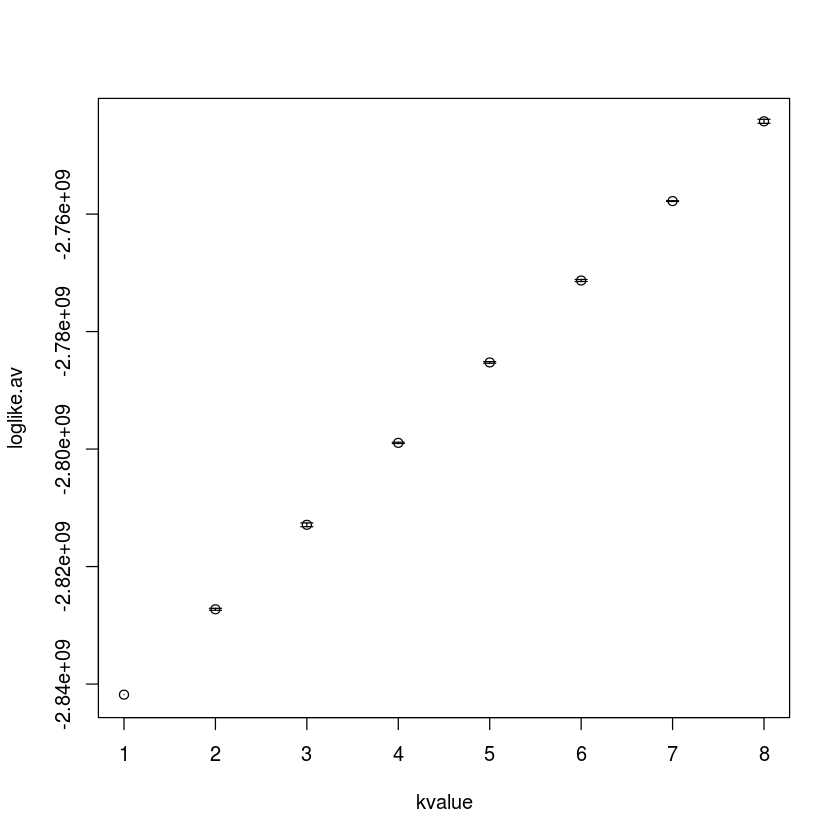

In [22]:
with(meanlikes, plot(kvalue, loglike.av))
with(meanlikes, arrows(kvalue, loglike.av-loglike.stdev, kvalue, loglike.av+loglike.stdev, length=0.05, angle=90, code=3))

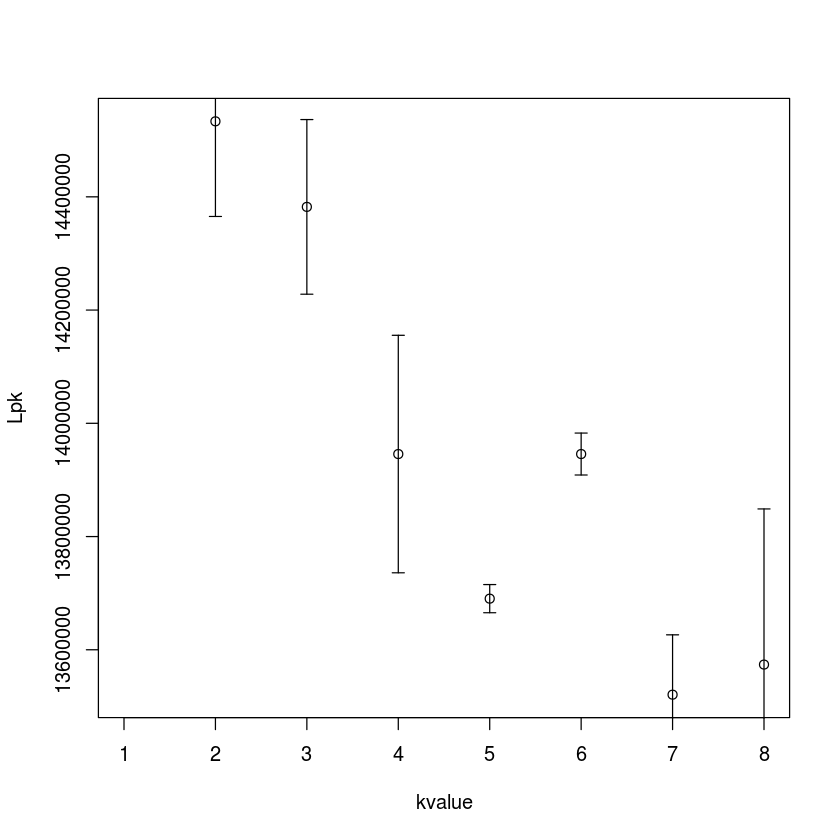

In [36]:
with(meanlikes, plot(kvalue, Lpk))
with(meanlikes, arrows(kvalue, Lpk-Lpk.s, kvalue, Lpk+Lpk.s, length=0.05, angle=90, code=3))

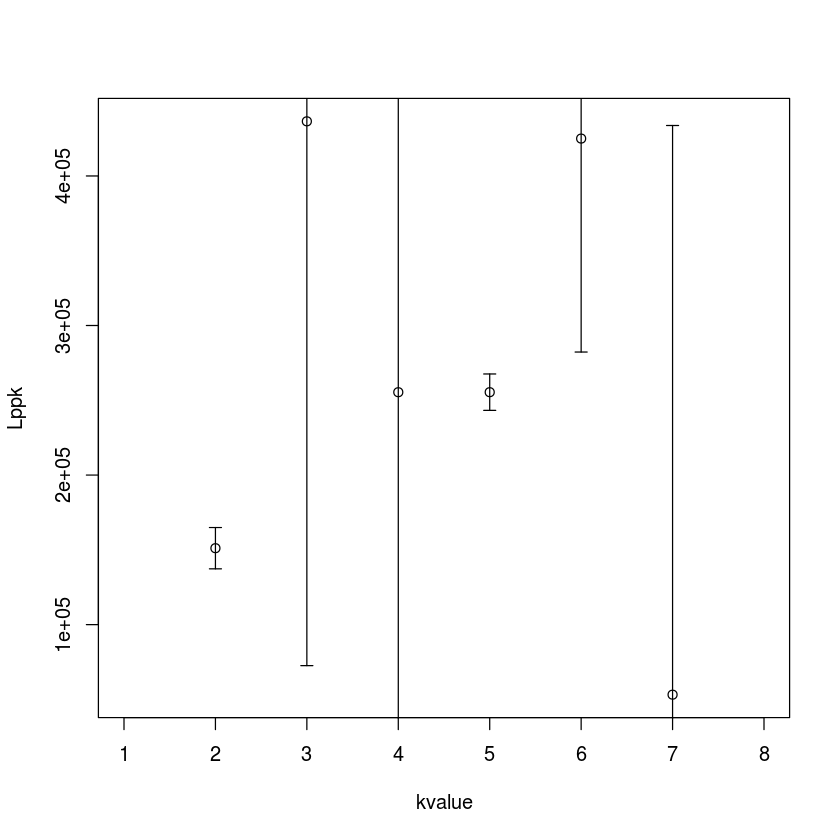

In [37]:
with(meanlikes, plot(kvalue, Lppk))
with(meanlikes, arrows(kvalue, Lppk-Lppk.s, kvalue, Lppk+Lppk.s, length=0.05, angle=90, code=3))

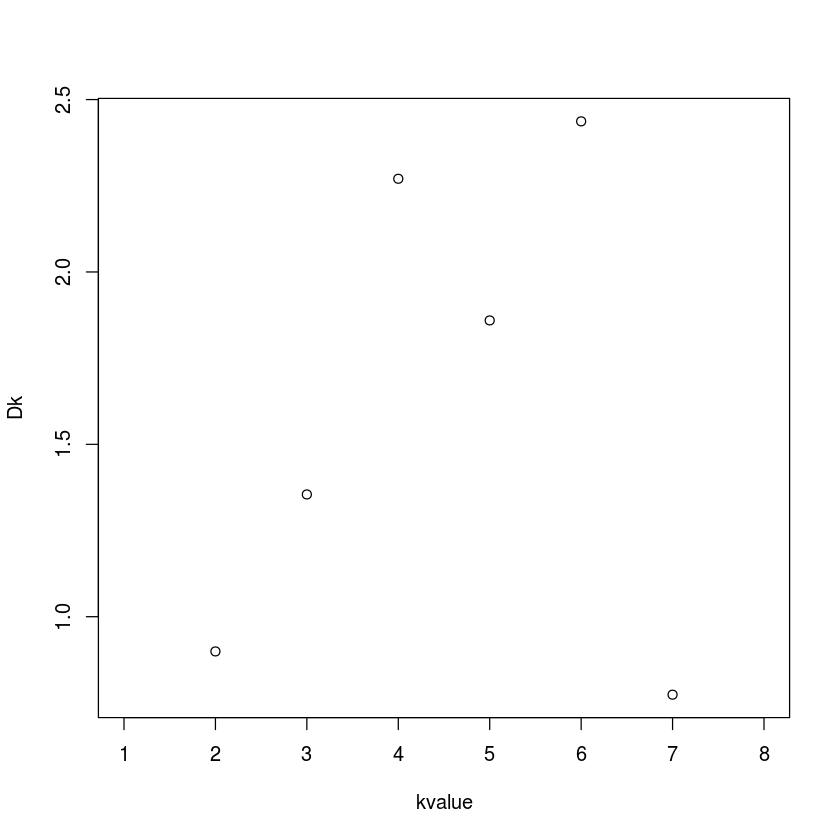

In [40]:
with(meanlikes, plot(kvalue, Dk))